### [Problem 1] Function for finding impureness

In [1]:
class ScratchDecisionTreeClassifierDepth1():
    """
    Depth 1 decision tree classifier scratch implementation

    Parameters
    ----------
    verbose : bool
      True to output the learning process
    """

    def __init__(self, verbose=False):
        # Record hyperparameters as attributes
        self.verbose = verbose

    def fit(self, X, y):
        """
        Learn the decision tree classifier
        Parameters
        ----------
        X : ndarray, shape (n_samples, n_features)
            Features of training data
        y : ndarray, shape (n_samples,)
            Correct answer value of training data
        """
        if self.verbose:
            # Output the learning process when verbose is set to True
            print("Learning process...")
        pass

    def predict(self, X):
        """
        Estimate the label using a decision tree classifier
        """
        pass
        return


In [2]:
def gini_impurity(classes):
    total_samples = sum(classes)
    impurity = 1 - sum((count / total_samples) ** 2 for count in classes)
    return impurity

# Example usage
print(gini_impurity([15, 15])) 
print(gini_impurity([15, 15, 15]))  
print(gini_impurity([18, 12]))  
print(gini_impurity([30, 0]))  


0.5
0.6666666666666667
0.48
0.0


### [Problem 2] Function for finding information gain

In [3]:
def gini_impurity(classes):
    total_samples = sum(classes)
    impurity = 1 - sum((count / total_samples) ** 2 for count in classes)
    return impurity

def information_gain(parent, left, right):
    # Calculate the Gini impurity of the parent node
    parent_impurity = gini_impurity(parent)
    
    # Calculate the Gini impurity of the left and right nodes
    left_impurity = gini_impurity(left)
    right_impurity = gini_impurity(right)
    
    # Calculate the proportion of samples in the left and right nodes
    total_samples = sum(parent)
    left_weight = sum(left) / total_samples
    right_weight = sum(right) / total_samples
    
    # Calculate the information gain
    ig = parent_impurity - (left_weight * left_impurity) - (right_weight * right_impurity)
    return ig

# Example usage
parent = [30, 35]
left = [10, 30]
right = [20, 5]

print(information_gain(parent, left, right)) 


0.14319526627218937


### [Problem 3] Learning

In [4]:
import numpy as np

class ScratchDecisionTreeClassifierDepth1:
    """
    Depth 1 decision tree classifier scratch implementation

    Parameters
    ----------
    verbose : bool
      True to output the learning process
    """

    def __init__(self, verbose=False):
        # Record hyperparameters as attributes
        self.verbose = verbose
        self.best_feature = None
        self.best_threshold = None
        self.left_class = None
        self.right_class = None

    def fit(self, X, y):
        """
        Learn the decision tree classifier
        Parameters
        ----------
        X : The following forms of ndarray, shape (n_samples, n_features)
            Features of training data
        y : The following form of ndarray, shape (n_samples,)
            Correct answer value of training data
        """
        n_samples, n_features = X.shape
        best_ig = -1
        
        for feature in range(n_features):
            thresholds = np.unique(X[:, feature])
            for threshold in thresholds:
                left_indices = X[:, feature] < threshold
                right_indices = X[:, feature] >= threshold
                left_classes = y[left_indices]
                right_classes = y[right_indices]
                
                if len(left_classes) == 0 or len(right_classes) == 0:
                    continue
                
                parent_classes = np.bincount(y)
                left_classes_count = np.bincount(left_classes, minlength=len(parent_classes))
                right_classes_count = np.bincount(right_classes, minlength=len(parent_classes))
                
                ig = information_gain(parent_classes, left_classes_count, right_classes_count)
                
                if ig > best_ig:
                    best_ig = ig
                    self.best_feature = feature
                    self.best_threshold = threshold
                    self.left_class = np.argmax(left_classes_count)
                    self.right_class = np.argmax(right_classes_count)

        if self.verbose:
            print(f"Best feature: {self.best_feature}")
            print(f"Best threshold: {self.best_threshold}")
            print(f"Left class: {self.left_class}")
            print(f"Right class: {self.right_class}")

    def predict(self, X):
        """
        Estimate the label using a decision tree classifier
        """
        if self.best_feature is None:
            raise Exception("The model is not trained yet!")

        predictions = []
        for x in X:
            if x[self.best_feature] < self.best_threshold:
                predictions.append(self.left_class)
            else:
                predictions.append(self.right_class)
        return np.array(predictions)

In [5]:
def gini_impurity(classes):
    total_samples = sum(classes)
    impurity = 1 - sum((count / total_samples) ** 2 for count in classes)
    return impurity

def information_gain(parent, left, right):
    # Calculate the Gini impurity of the parent node
    parent_impurity = gini_impurity(parent)
    
    # Calculate the Gini impurity of the left and right nodes
    left_impurity = gini_impurity(left)
    right_impurity = gini_impurity(right)
    
    # Calculate the proportion of samples in the left and right nodes
    total_samples = sum(parent)
    left_weight = sum(left) / total_samples
    right_weight = sum(right) / total_samples
    
    # Calculate the information gain
    ig = parent_impurity - (left_weight * left_impurity) - (right_weight * right_impurity)
    return ig

In [6]:
X_train = np.array([[2.5, 1, 5], [3.5, 0, 6], [1.5, 1, 7], [4.5, 0, 8]])
y_train = np.array([0, 1, 0, 1])

model = ScratchDecisionTreeClassifierDepth1(verbose=True)
model.fit(X_train, y_train)
predictions = model.predict(X_train)

print("Predictions:", predictions)

Best feature: 0
Best threshold: 3.5
Left class: 0
Right class: 1
Predictions: [0 1 0 1]


### [Problem 4] Estimate

In [7]:
class ScratchDecisionTreeClassifierDepth1:
    """
    Depth 1 decision tree classifier scratch implementation

    Parameters
    ----------
    verbose : bool
      True to output the learning process
    """

    def __init__(self, verbose=False):
        # Record hyperparameters as attributes
        self.verbose = verbose
        self.best_feature = None
        self.best_threshold = None
        self.left_class = None
        self.right_class = None

    def fit(self, X, y):
        """
        Learn the decision tree classifier
        Parameters
        ----------
        X : The following forms of ndarray, shape (n_samples, n_features)
            Features of training data
        y : The following form of ndarray, shape (n_samples,)
            Correct answer value of training data
        """
        n_samples, n_features = X.shape
        best_ig = -1
        
        for feature in range(n_features):
            thresholds = np.unique(X[:, feature])
            for threshold in thresholds:
                left_indices = X[:, feature] < threshold
                right_indices = X[:, feature] >= threshold
                left_classes = y[left_indices]
                right_classes = y[right_indices]
                
                if len(left_classes) == 0 or len(right_classes) == 0:
                    continue
                
                parent_classes = np.bincount(y)
                left_classes_count = np.bincount(left_classes, minlength=len(parent_classes))
                right_classes_count = np.bincount(right_classes, minlength=len(parent_classes))
                
                ig = information_gain(parent_classes, left_classes_count, right_classes_count)
                
                if ig > best_ig:
                    best_ig = ig
                    self.best_feature = feature
                    self.best_threshold = threshold
                    self.left_class = np.argmax(left_classes_count)
                    self.right_class = np.argmax(right_classes_count)

        if self.verbose:
            print(f"Best feature: {self.best_feature}")
            print(f"Best threshold: {self.best_threshold}")
            print(f"Left class: {self.left_class}")
            print(f"Right class: {self.right_class}")

    def predict(self, X):
        """
        Estimate the label using a decision tree classifier
        """
        if self.best_feature is None:
            raise Exception("The model is not trained yet!")

        predictions = []
        for x in X:
            if x[self.best_feature] < self.best_threshold:
                predictions.append(self.left_class)
            else:
                predictions.append(self.right_class)
        return np.array(predictions)

In [8]:
def information_gain(parent, left, right):
    # Calculate the Gini impurity of the parent node
    parent_impurity = gini_impurity(parent)
    
    # Calculate the Gini impurity of the left and right nodes
    left_impurity = gini_impurity(left)
    right_impurity = gini_impurity(right)
    
    # Calculate the proportion of samples in the left and right nodes
    total_samples = sum(parent)
    left_weight = sum(left) / total_samples
    right_weight = sum(right) / total_samples
    
    # Calculate the information gain
    ig = parent_impurity - (left_weight * left_impurity) - (right_weight * right_impurity)
    return ig


In [9]:
# usage
X_train = np.array([[2.5, 1, 5], [3.5, 0, 6], [1.5, 1, 7], [4.5, 0, 8]])
y_train = np.array([0, 1, 0, 1])

model = ScratchDecisionTreeClassifierDepth1(verbose=True)
model.fit(X_train, y_train)
predictions = model.predict(X_train)

print("Predictions:", predictions)

Best feature: 0
Best threshold: 3.5
Left class: 0
Right class: 1
Predictions: [0 1 0 1]


### [Problem 5] Learning and estimation

In [10]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.tree import DecisionTreeClassifier

# Simple Dataset 2
X_simple = np.array([[2.5, 1, 5],
                     [3.5, 0, 6],
                     [1.5, 1, 7],
                     [4.5, 0, 8],
                     [2.7, 1, 4],
                     [3.6, 0, 5],
                     [1.3, 1, 6],
                     [4.7, 0, 7]])

y_simple = np.array([0, 1, 0, 1, 0, 1, 0, 1])

In [11]:
# Split the dataset into a training and testing set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_simple, y_simple, test_size=0.5, random_state=42)


In [12]:
# Instantiate the Scratch Decision Tree Classifier
scratch_model = ScratchDecisionTreeClassifierDepth1(verbose=True)
scratch_model.fit(X_train, y_train)
scratch_predictions = scratch_model.predict(X_test)

Best feature: 0
Best threshold: 4.5
Left class: 0
Right class: 1


In [13]:
# Calculate the accuracy, precision, and recall
scratch_accuracy = accuracy_score(y_test, scratch_predictions)
scratch_precision = precision_score(y_test, scratch_predictions)
scratch_recall = recall_score(y_test, scratch_predictions)

In [14]:
print("Scratch Decision Tree Classifier:")
print(f"Accuracy: {scratch_accuracy}")
print(f"Precision: {scratch_precision}")
print(f"Recall: {scratch_recall}")

Scratch Decision Tree Classifier:
Accuracy: 0.5
Precision: 1.0
Recall: 0.3333333333333333


In [15]:
# Instantiate and train the scikit-learn Decision Tree Classifier
sklearn_model = DecisionTreeClassifier(max_depth=1, random_state=42)
sklearn_model.fit(X_train, y_train)
sklearn_predictions = sklearn_model.predict(X_test)

In [16]:
# Calculate the accuracy, precision, and recall
sklearn_accuracy = accuracy_score(y_test, sklearn_predictions)
sklearn_precision = precision_score(y_test, sklearn_predictions)
sklearn_recall = recall_score(y_test, sklearn_predictions)

In [17]:
print("\nScikit-learn Decision Tree Classifier:")
print(f"Accuracy: {sklearn_accuracy}")
print(f"Precision: {sklearn_precision}")
print(f"Recall: {sklearn_recall}")


Scikit-learn Decision Tree Classifier:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0


### [Problem 6] Visualization of decision area

In [22]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.tree import DecisionTreeClassifier

# Define the plotting function
def plot_decision_boundary(model, X, y, title="Decision Boundary"):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8, cmap=ListedColormap(['#FFAAAA', '#AAAAFF']))
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', marker='o', cmap=ListedColormap(['#FF0000', '#0000FF']))
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(title)
    plt.show()


In [23]:
# # Select features for visualization
# X_train_2D = X_train[:, :2]
# X_test_2D = X_test[:, :2]


# Example data (2D for visualization)
X_train = np.array([[2.5, 1], [3.5, 0], [1.5, 1], [4.5, 0]])
y_train = np.array([0, 1, 0, 1])
X_test = np.array([[2.0, 1], [3.0, 0]])
y_test = np.array([0, 1])

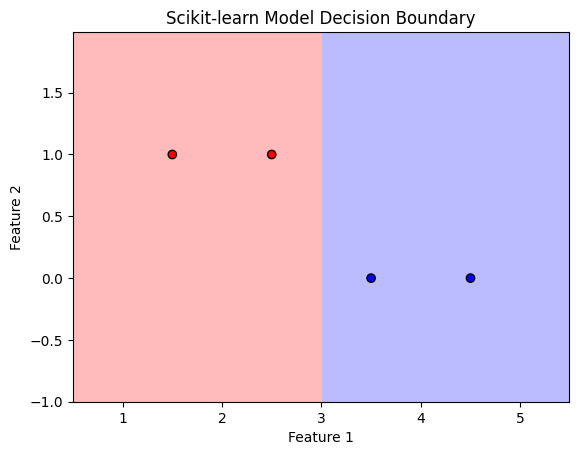

In [24]:
# Train and plot decision boundary for scikit-learn model
# Ensure the model is trained with the same number of features as used for prediction
sklearn_model = DecisionTreeClassifier(max_depth=1)
sklearn_model.fit(X_train, y_train)
plot_decision_boundary(sklearn_model, X_train, y_train, title="Scikit-learn Model Decision Boundary")



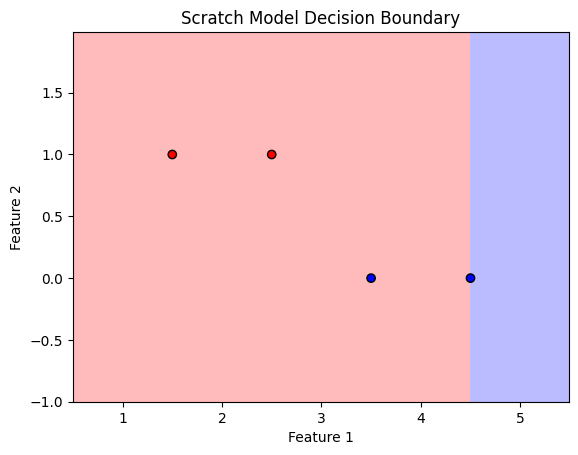

In [25]:
# Visualization with scratch model
plot_decision_boundary(scratch_model, X_train, y_train, title="Scratch Model Decision Boundary")

### [Problem 7] (Advance assignment) Creation of a decision tree classifier class with a depth of 2

In [43]:
import numpy as np

class ScratchDecisionTreeClassifierDepth2:
    def __init__(self, verbose=False):
        self.verbose = verbose
        self.tree = None

    def gini_impurity(self, y):
        """Calculate Gini impurity for a node."""
        classes, counts = np.unique(y, return_counts=True)
        impurity = 1 - sum((count / len(y)) ** 2 for count in counts)
        return impurity

    def information_gain(self, y, left_y, right_y):
        """Calculate information gain from splitting."""
        parent_impurity = self.gini_impurity(y)
        left_impurity = self.gini_impurity(left_y) if len(left_y) > 0 else 0
        right_impurity = self.gini_impurity(right_y) if len(right_y) > 0 else 0
        left_weight = len(left_y) / len(y)
        right_weight = len(right_y) / len(y)
        return parent_impurity - (left_weight * left_impurity + right_weight * right_impurity)

    def best_split(self, X, y):
        """Find the best feature and threshold to split."""
        best_gain = 0
        best_split = None
        n_features = X.shape[1]
        
        for feature in range(n_features):
            thresholds = np.unique(X[:, feature])
            for threshold in thresholds:
                left_mask = X[:, feature] <= threshold
                right_mask = X[:, feature] > threshold
                left_y, right_y = y[left_mask], y[right_mask]
                gain = self.information_gain(y, left_y, right_y)
                if gain > best_gain:
                    best_gain = gain
                    best_split = (feature, threshold)
        
        return best_split

    def fit(self, X, y):
        """Fit the decision tree classifier."""
        self.tree = self._build_tree(X, y, depth=2)
        if self.verbose:
            print("Tree built successfully.")
            self._print_tree(self.tree)

    def _build_tree(self, X, y, depth):
        """Recursively build the decision tree."""
        if depth == 0 or len(np.unique(y)) == 1:
            return np.bincount(y).argmax()  # Leaf node
        
        feature, threshold = self.best_split(X, y)
        if feature is None:
            return np.bincount(y).argmax()  # Leaf node if no valid split
        
        left_mask = X[:, feature] <= threshold
        right_mask = X[:, feature] > threshold
        left_node = self._build_tree(X[left_mask], y[left_mask], depth - 1)
        right_node = self._build_tree(X[right_mask], y[right_mask], depth - 1)
        
        return (feature, threshold, left_node, right_node)

    def _predict_node(self, node, x):
        """Predict class for a single sample using the tree."""
        if isinstance(node, int):  # Leaf node
            return node
        elif isinstance(node, tuple):  # Decision node
            feature, threshold, left_node, right_node = node
            if x[feature] <= threshold:
                return self._predict_node(left_node, x)
            else:
                return self._predict_node(right_node, x)
        else:
            raise ValueError(f"Unexpected node type: {type(node)}")

    def predict(self, X):
        """Predict classes for all samples."""
        return np.array([self._predict_node(self.tree, x) for x in X])

    def _print_tree(self, node, depth=0):
        """Print the tree structure for debugging."""
        if isinstance(node, int):
            print(f"{'  ' * depth}Leaf node with class {node}")
        elif isinstance(node, tuple):
            feature, threshold, left_node, right_node = node
            print(f"{'  ' * depth}Decision node: feature {feature} <= {threshold}")
            print(f"{'  ' * (depth + 1)}Left subtree:")
            self._print_tree(left_node, depth + 1)
            print(f"{'  ' * (depth + 1)}Right subtree:")
            self._print_tree(right_node, depth + 1)
        else:
            raise ValueError(f"Unexpected node type during tree print: {type(node)}")


In [44]:
X_train = np.array([[2.5, 1], [3.5, 0], [1.5, 1], [4.5, 0], [2.0, 0], [5.0, 1]])
y_train = np.array([0, 1, 0, 1, 0, 1])

# Initialize and train the model
model = ScratchDecisionTreeClassifierDepth2(verbose=True)
model.fit(X_train, y_train)

# Predictions
X_test = np.array([[2.0, 1], [3.0, 0]])
predictions = model.predict(X_test)
print("Predictions:", predictions)

Tree built successfully.
Decision node: feature 0 <= 2.5
  Left subtree:


ValueError: Unexpected node type during tree print: <class 'numpy.int64'>

In [45]:
import numpy as np

class ScratchDecisionTreeClassifierDepth2:
    def __init__(self, verbose=False):
        self.verbose = verbose
        self.tree = None

    def gini_impurity(self, y):
        """Calculate Gini impurity for a node."""
        classes, counts = np.unique(y, return_counts=True)
        impurity = 1 - sum((count / len(y)) ** 2 for count in counts)
        return impurity

    def information_gain(self, y, left_y, right_y):
        """Calculate information gain from splitting."""
        parent_impurity = self.gini_impurity(y)
        left_impurity = self.gini_impurity(left_y) if len(left_y) > 0 else 0
        right_impurity = self.gini_impurity(right_y) if len(right_y) > 0 else 0
        left_weight = len(left_y) / len(y)
        right_weight = len(right_y) / len(y)
        return parent_impurity - (left_weight * left_impurity + right_weight * right_impurity)

    def best_split(self, X, y):
        """Find the best feature and threshold to split."""
        best_gain = 0
        best_split = None
        n_features = X.shape[1]
        
        for feature in range(n_features):
            thresholds = np.unique(X[:, feature])
            for threshold in thresholds:
                left_mask = X[:, feature] <= threshold
                right_mask = X[:, feature] > threshold
                left_y, right_y = y[left_mask], y[right_mask]
                gain = self.information_gain(y, left_y, right_y)
                if gain > best_gain:
                    best_gain = gain
                    best_split = (feature, threshold)
        
        return best_split

    def fit(self, X, y):
        """Fit the decision tree classifier."""
        self.tree = self._build_tree(X, y, depth=2)
        if self.verbose:
            print("Tree built successfully.")
            self._print_tree(self.tree)

    def _build_tree(self, X, y, depth):
        """Recursively build the decision tree."""
        if depth == 0 or len(np.unique(y)) == 1:
            return np.bincount(y).argmax()  # Leaf node
        
        feature, threshold = self.best_split(X, y)
        if feature is None:
            return np.bincount(y).argmax()  # Leaf node if no valid split
        
        left_mask = X[:, feature] <= threshold
        right_mask = X[:, feature] > threshold
        left_node = self._build_tree(X[left_mask], y[left_mask], depth - 1)
        right_node = self._build_tree(X[right_mask], y[right_mask], depth - 1)
        
        return (feature, threshold, left_node, right_node)

    def _predict_node(self, node, x):
        """Predict class for a single sample using the tree."""
        if isinstance(node, int):  # Leaf node
            return node
        elif isinstance(node, tuple):  # Decision node
            feature, threshold, left_node, right_node = node
            if x[feature] <= threshold:
                return self._predict_node(left_node, x)
            else:
                return self._predict_node(right_node, x)
        else:
            raise ValueError(f"Unexpected node type: {type(node)}")

    def predict(self, X):
        """Predict classes for all samples."""
        if self.tree is None:
            raise RuntimeError("The model has not been trained yet.")
        return np.array([self._predict_node(self.tree, x) for x in X])

    def _print_tree(self, node, depth=0):
        """Print the tree structure for debugging."""
        if isinstance(node, int):
            print(f"{'  ' * depth}Leaf node with class {node}")
        elif isinstance(node, tuple):
            feature, threshold, left_node, right_node = node
            print(f"{'  ' * depth}Decision node: feature {feature} <= {threshold}")
            print(f"{'  ' * (depth + 1)}Left subtree:")
            self._print_tree(left_node, depth + 1)
            print(f"{'  ' * (depth + 1)}Right subtree:")
            self._print_tree(right_node, depth + 1)
        else:
            raise ValueError(f"Unexpected node type during tree print: {type(node)}")

# Example dataset
X_train = np.array([[2.5, 1], [3.5, 0], [1.5, 1], [4.5, 0], [2.0, 0], [5.0, 1]])
y_train = np.array([0, 1, 0, 1, 0, 1])

# Initialize and train the model
model = ScratchDecisionTreeClassifierDepth2(verbose=True)
model.fit(X_train, y_train)

# Predictions
X_test = np.array([[2.0, 1], [3.0, 0]])
predictions = model.predict(X_test)
print("Predictions:", predictions)


Tree built successfully.
Decision node: feature 0 <= 2.5
  Left subtree:


ValueError: Unexpected node type during tree print: <class 'numpy.int64'>